<div style="text-align: right"> <font color='Gray'> Sociofísica - 2023 </div>
<div style="text-align: right"> <font color='Gray'> Tarea N° 2 </div>
<div style="text-align: right"> <font color='Gray'> Sebastián Pulgares </div>


***

Tarea 2: Majority Rule
-------------------------
### Descripción
....
### Simulacion
...

## To do list:
* Register the faith point in a log and add it to the plot.
* Add the arrows?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Prob(L, P0, *args): #Esta función es P(t+1), se calcula como aparece en el paper
    if np.sum(args) != 1 or len(args) != L:
        return print('los valores de a_n no suman 1 o no coinciden con L')
    else:
        total_sum = 0
        for i in range(1, len(args) + 1):
            b = args[i - 1]
            sum_i = 0
            for j in range(int(np.floor((i / 2) + 1)), i + 1):
                C = (np.math.factorial(i)) / ((np.math.factorial(i - j)) * (np.math.factorial(j)))
                Py = j
                Pn = i - j
                su = b * np.sum(C * P0 ** Py * (1-P0) ** Pn)
                sum_i += su
                total_sum += su
        return sum_i, total_sum

In [3]:
def plotter(L,*args): #Esta función itera para distintos P(0) iniciales y grafica
    P0=np.linspace(0,1,100)
    total_sum_values=[]
    for item in P0:
        try:
            sum_i, total_sum = Prob(L, item, *args)
            total_sum_values.append(total_sum)
        except:
            print('')
            break
    if len(total_sum_values)!=0:
        plt.plot(P0,total_sum_values)
        plt.plot(P0,P0)
        plt.xlabel(r'$P_+$ en tiempo t')
        plt.ylabel(r'$P_+$ en tiempo t+1')
        plt.xlim(0, 1)
        plt.ylim(0,1)
        plt.grid(True)
        plt.show()

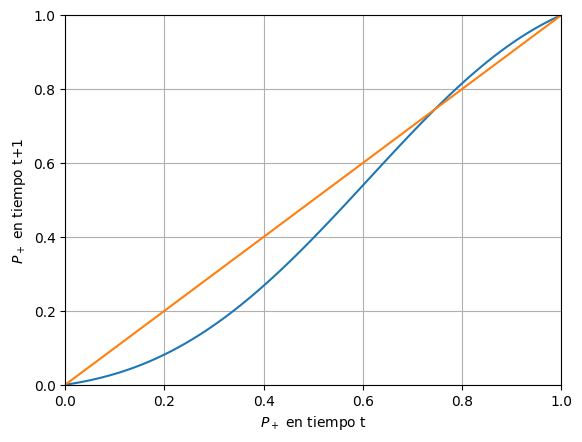

In [4]:
plotter(6,0.2,0.2,0.2,0.2,0.1,0.1)